# Setting up

In [1]:
from dotenv import load_dotenv
load_dotenv()

True

In [2]:
import os
MONDAY_KEY = os.getenv("MONDAY_KEY")
import requests

def run_query(query): # A simple function to use requests.post to make the API call. Note the json= section.
    request = requests.post('https://api.monday.com/v2', json={'query': query}, headers=headers)
    if request.status_code == 200:
        return request.json()
    else:
        raise Exception("Query failed to run by returning code of {}. {}".format(request.status_code, query))

headers = {"Authorization":MONDAY_KEY}

# Who owns most boards?

In [3]:
query = """
{
  boards(limit:1000) {
      id 
      name
    	owner {
        name
      }
    }
}
"""        
result = run_query(query)
print(result["data"])

{'boards': [{'id': '117607607', 'name': 'Software update requests', 'owner': {'name': 'Alper Aydemir'}}, {'id': '118277986', 'name': 'Brand and creative backlog', 'owner': {'name': 'julia.krantz@volumental.com'}}, {'id': '119285058', 'name': 'Alper', 'owner': {'name': 'Alper Aydemir'}}, {'id': '119522493', 'name': 'Old Scanner sales', 'owner': {'name': 'henrik.bronnegard@volumental.com'}}, {'id': '119941922', 'name': 'Product - Retail Scanner', 'owner': {'name': 'Alper Aydemir'}}, {'id': '119941959', 'name': 'Product - Vaka', 'owner': {'name': 'Alper Aydemir'}}, {'id': '119942028', 'name': 'Product - Omni', 'owner': {'name': 'Alper Aydemir'}}, {'id': '120056215', 'name': 'External product deadlines', 'owner': {'name': 'Alper Aydemir'}}, {'id': '120793385', 'name': 'Major ideation projects', 'owner': {'name': 'Alper Aydemir'}}, {'id': '120820357', 'name': 'Infrastructure / DevOps', 'owner': {'name': 'Alper Aydemir'}}, {'id': '121222983', 'name': 'Operations', 'owner': {'name': 'Jon Duvn

In [4]:
import pandas as pd
df = pd.DataFrame.from_dict(result["data"]["boards"])

In [5]:
df.dtypes

id       object
name     object
owner    object
dtype: object

In [6]:
df

,id,name,owner
0,117607607,Software update requests,{'name': 'Alper Aydemir'}
1,118277986,Brand and creative backlog,{'name': 'julia.krantz@volumental.com'}
2,119285058,Alper,{'name': 'Alper Aydemir'}
3,119522493,Old Scanner sales,{'name': 'henrik.bronnegard@volumental.com'}
4,119941922,Product - Retail Scanner,{'name': 'Alper Aydemir'}
...,...,...,...
139,320717717,4 Paying Tgd Mkg Customers April 2020 Goal Board,{'name': 'Ingrid Bonde Åkerlind'}
140,320748494,Open questions KAM / Lukas,{'name': 'Yohan Braoudakis'}
141,320870710,User Testing internship - Recruitment Roadmap,{'name': 'Mariana Puhlmann'}
142,320873285,Swedish scanners assemblers - Recruitment Roadmap,{'name': 'Mariana Puhlmann'}


In [7]:
df.owner

0                         {'name': 'Alper Aydemir'}
1           {'name': 'julia.krantz@volumental.com'}
2                         {'name': 'Alper Aydemir'}
3      {'name': 'henrik.bronnegard@volumental.com'}
4                         {'name': 'Alper Aydemir'}
                           ...                     
139               {'name': 'Ingrid Bonde Åkerlind'}
140                    {'name': 'Yohan Braoudakis'}
141                    {'name': 'Mariana Puhlmann'}
142                    {'name': 'Mariana Puhlmann'}
143                       {'name': 'Alice Wristel'}
Name: owner, Length: 144, dtype: object

In [8]:
from pandas.io.json import json_normalize
df.owner = json_normalize(df["owner"], meta=["name"])

In [9]:
df

,id,name,owner
0,117607607,Software update requests,Alper Aydemir
1,118277986,Brand and creative backlog,julia.krantz@volumental.com
2,119285058,Alper,Alper Aydemir
3,119522493,Old Scanner sales,henrik.bronnegard@volumental.com
4,119941922,Product - Retail Scanner,Alper Aydemir
...,...,...,...
139,320717717,4 Paying Tgd Mkg Customers April 2020 Goal Board,Ingrid Bonde Åkerlind
140,320748494,Open questions KAM / Lukas,Yohan Braoudakis
141,320870710,User Testing internship - Recruitment Roadmap,Mariana Puhlmann
142,320873285,Swedish scanners assemblers - Recruitment Roadmap,Mariana Puhlmann


In [10]:
df["count"] = 1

In [50]:
print(df.groupby(['owner']).count())
toplist = df.groupby(['owner']).count().sort_values("count", ascending=True)['count']
toplist.shape

                                  id  name  count
owner                                            
Aina Rosselló                      4     4      4
Akanksha Srivastava                4     4      4
Alice Wristel                      2     2      2
Alper Aydemir                     24    24     24
Anna Malkan                        2     2      2
Boa Jung                           4     4      4
Corinna Karg                       1     1      1
Courtney Thomas                    1     1      1
Dan Engelke                        1     1      1
Eric Abrahamsson                  12    12     12
Eveline Visee                      1     1      1
Ingrid Bonde Åkerlind             16    16     16
Jon Duvnjak                        9     9      9
Josef Grahn                        3     3      3
Karthik Parupalli                  1     1      1
Kristina Jurca                     1     1      1
Liz Connor                         1     1      1
Mariana Puhlmann                  10    10     10


(33,)

Text(0.5, 0, 'Boards owned')

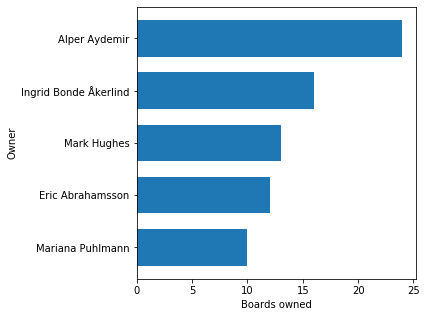

In [38]:
from matplotlib import pyplot as plt
toplist_plot = toplist.tail(5).plot(kind='barh', figsize=(5, 5), width=0.7)
toplist_plot.set_ylabel("Owner")
toplist_plot.set_xlabel("Boards owned")

# How many updates have we made?

In [13]:
query = """
{
    updates(limit:10000) {
    	created_at
    	creator {
        name
      }
    }
}
"""
result = run_query(query)
print(result["data"])
updates_df = pd.DataFrame.from_dict(result["data"]["updates"])

{'updates': [{'created_at': '2019-09-19T08:46:11Z', 'creator': {'name': 'marc.armgren@volumental.com'}}, {'created_at': '2019-09-18T19:22:26Z', 'creator': {'name': 'Mark Hughes'}}, {'created_at': '2019-09-18T18:24:29Z', 'creator': {'name': 'miroslav.kobetski@volumental.com'}}, {'created_at': '2019-09-18T15:33:02Z', 'creator': {'name': 'Eveline Visee'}}, {'created_at': '2019-09-18T15:28:52Z', 'creator': {'name': 'Mariana Puhlmann'}}, {'created_at': '2019-09-18T15:02:56Z', 'creator': {'name': 'Hanyue Zhou'}}, {'created_at': '2019-09-18T14:10:44Z', 'creator': {'name': 'Silvia Scalisi'}}, {'created_at': '2019-09-18T14:00:34Z', 'creator': {'name': 'Akanksha Srivastava'}}, {'created_at': '2019-09-18T14:00:19Z', 'creator': {'name': 'Christian Adåker'}}, {'created_at': '2019-09-18T13:42:53Z', 'creator': {'name': 'miroslav.kobetski@volumental.com'}}, {'created_at': '2019-09-18T13:25:55Z', 'creator': {'name': 'Mikael Andersson'}}, {'created_at': '2019-09-18T13:25:38Z', 'creator': {'name': 'Mikae

In [14]:
updates_df.head()

,created_at,creator
0,2019-09-19T08:46:11Z,{'name': 'marc.armgren@volumental.com'}
1,2019-09-18T19:22:26Z,{'name': 'Mark Hughes'}
2,2019-09-18T18:24:29Z,{'name': 'miroslav.kobetski@volumental.com'}
3,2019-09-18T15:33:02Z,{'name': 'Eveline Visee'}
4,2019-09-18T15:28:52Z,{'name': 'Mariana Puhlmann'}


In [15]:
updates_df.creator = json_normalize(updates_df["creator"], meta=["name"])

In [16]:
updates_df["created_at"] = (pd.to_datetime(updates_df.created_at, infer_datetime_format=True))
updates_df.sort_values("created_at", ascending=True)

,created_at,creator
6904,2018-08-09 11:33:51,Alper Aydemir
6903,2018-08-09 12:45:20,Alper Aydemir
6902,2018-08-10 08:45:32,Alper Aydemir
6901,2018-08-10 11:03:44,lukas.tallund@volumental.com
6900,2018-08-13 09:30:06,Alper Aydemir
...,...,...
4,2019-09-18 15:28:52,Mariana Puhlmann
3,2019-09-18 15:33:02,Eveline Visee
2,2019-09-18 18:24:29,miroslav.kobetski@volumental.com
1,2019-09-18 19:22:26,Mark Hughes


In [17]:
updates_df["total_updates"] = updates_df.index
updates_df["total_updates"] = updates_df.created_at.count() - updates_df["total_updates"]

Text(0.5, 0, 'Time')

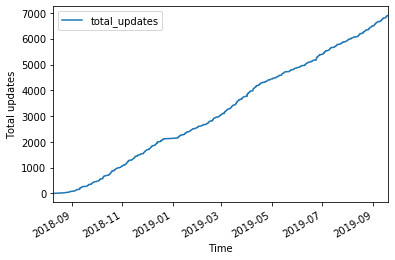

In [18]:
updates_df_plot = updates_df.plot(x="created_at", y="total_updates")
updates_df_plot.set_ylabel("Total updates")
updates_df_plot.set_xlabel("Time")

# Who makes the most updates?

In [26]:
updates_df["count"] = 1
top_updaters = updates_df.groupby(['creator']).count().sort_values("count", ascending=True)['count']

In [48]:
top_updaters.shape

(53,)

Text(0.5, 0, 'Updates created')

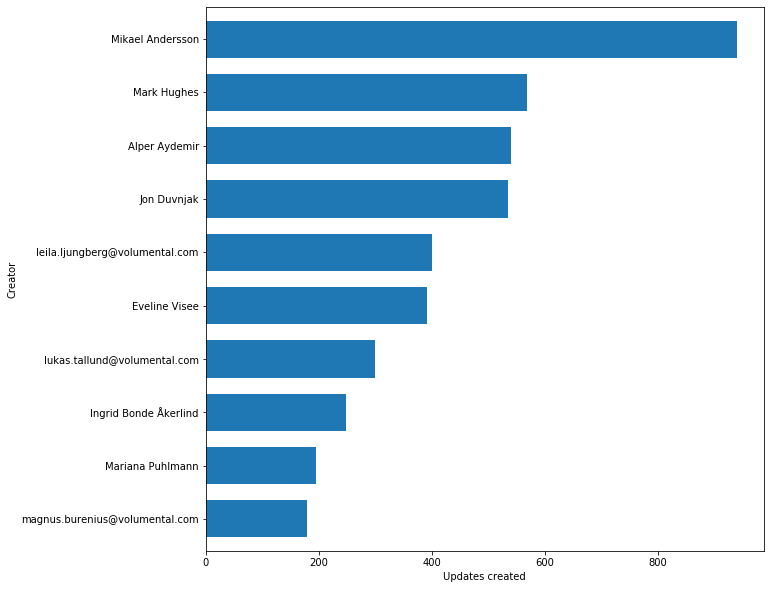

In [39]:
top_updaters_plot = top_updaters.tail(10).plot(kind='barh', figsize=(10, 10), width=0.7)
top_updaters_plot.set_ylabel("Creator")
top_updaters_plot.set_xlabel("Updates created")